The consumer credit department of a bank wants to automate the decisionmaking process for approval of home equity lines of credit. To do this, they will follow the recommendations of the Equal Credit Opportunity Act to create an empirically derived and statistically sound credit scoring model. The model will be based on data collected from recent applicants granted credit through the current process of loan underwriting. The model will be built from predictive modeling tools, but the created model must be sufficiently interpretable to provide a reason for any adverse actions (rejections).

In [1]:
!pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **DATA SETUP**

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import fetch_openml
hmeq = fetch_openml(name="HMEQ_Data",version=1,as_frame=True)

In [4]:
df = hmeq['data']
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1.0,1100.0,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1.0,1300.0,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1.0,1500.0,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1.0,1500.0,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1700.0,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
df.shape

(5960, 13)

In [6]:
df.dtypes

BAD        float64
LOAN       float64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [7]:
df.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
DEBTINC    4693
dtype: int64

In [8]:
df.isna().sum()/df.shape[0]*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True, stratify=df['BAD'])

# **EXPLORATORY DATA ANALYSIS**

In [10]:
df_train.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,4768.000000,4768.000000,4347.000000,4679.000000,4365.000000,4180.000000,4296.000000,4509.000000,4354.000000,4584.000000,3763.000000
mean,0.199455,18531.900168,73678.835335,101640.012127,8.913253,0.256699,0.456704,179.501872,1.188792,21.277269,33.760828
std,0.399632,11230.906348,44250.790495,56972.625494,7.602820,0.848906,1.149576,86.217309,1.724861,10.228660,8.316636
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11000.000000,46122.000000,66192.500000,3.000000,0.000000,0.000000,115.558530,0.000000,14.000000,29.201439
50%,0.000000,16200.000000,65022.000000,89250.000000,7.000000,0.000000,0.000000,173.495392,1.000000,20.000000,34.802429
75%,0.000000,23300.000000,91731.500000,119780.000000,13.000000,0.000000,0.000000,230.072131,2.000000,26.000000,38.961062
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


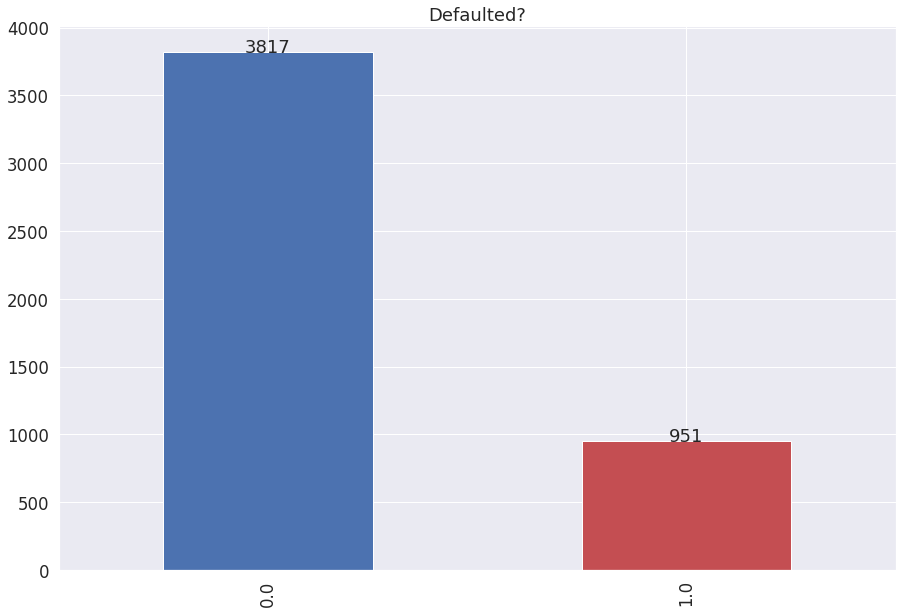

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

df_train["BAD"].value_counts().plot(kind='bar', color=['C0', 'C3'], figsize=(15, 10))
# 'C7' is Grey
# plt.xlabel("Loan Approval", labelpad=14)
# plt.ylabel("Count of Records", labelpad=14)
plt.title("Defaulted?")
df_train["BAD"].value_counts()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
addlabels(df_train["BAD"].value_counts().index, df_train["BAD"].value_counts().values)

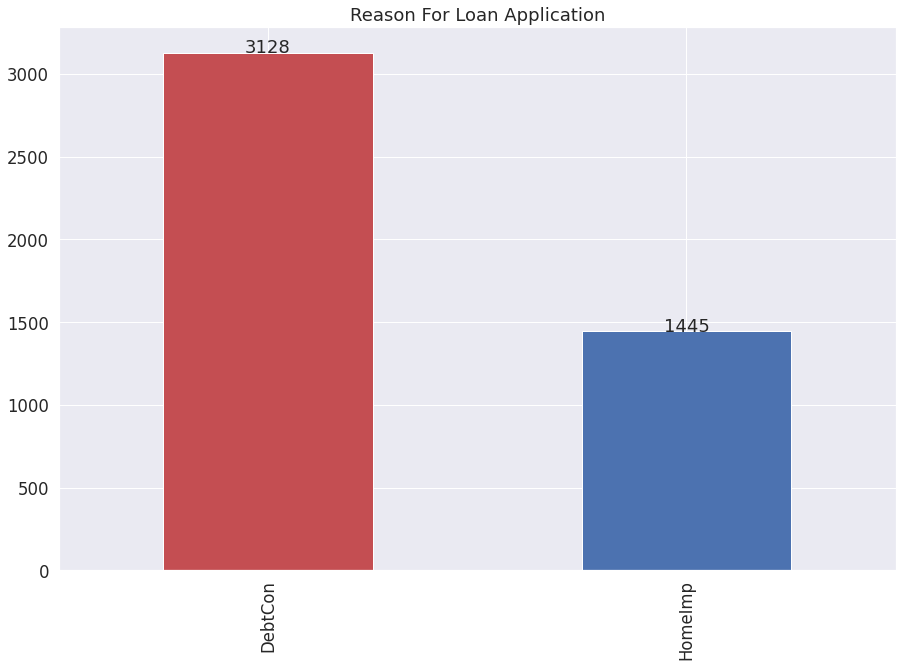

In [12]:
df_train["REASON"].value_counts().plot(kind='bar', color=['C3', 'C0'], figsize=(15, 10))
plt.title("Reason For Loan Application")
addlabels(df_train["REASON"].value_counts().index, df_train["REASON"].value_counts().values)

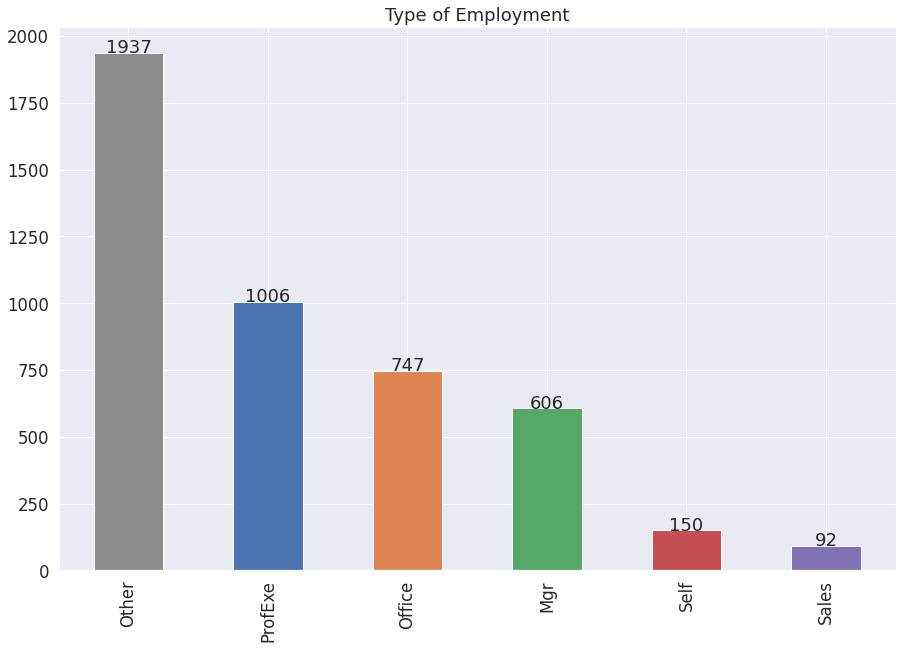

In [13]:
df_train["JOB"].value_counts().plot(kind='bar', color=['C7','C0','C1','C2','C3','C4'], figsize=(15, 10))
plt.title("Type of Employment")
addlabels(df_train["JOB"].value_counts().index, df_train["JOB"].value_counts().values)

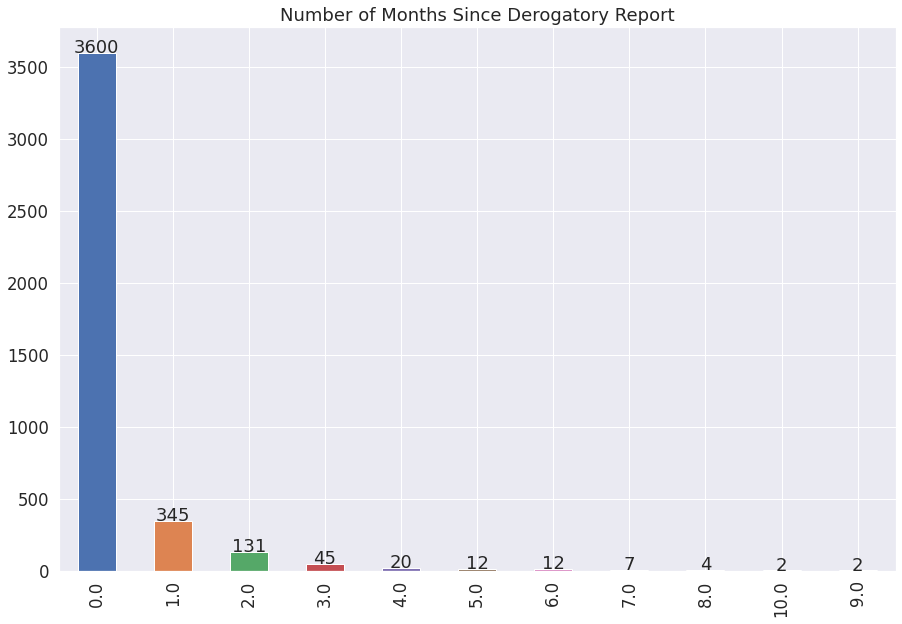

In [14]:
df_train["DEROG"].value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9'], figsize=(15, 10))
plt.title("Number of Months Since Derogatory Report")
addlabels(df_train["DEROG"].value_counts().index, df_train["DEROG"].value_counts().values)

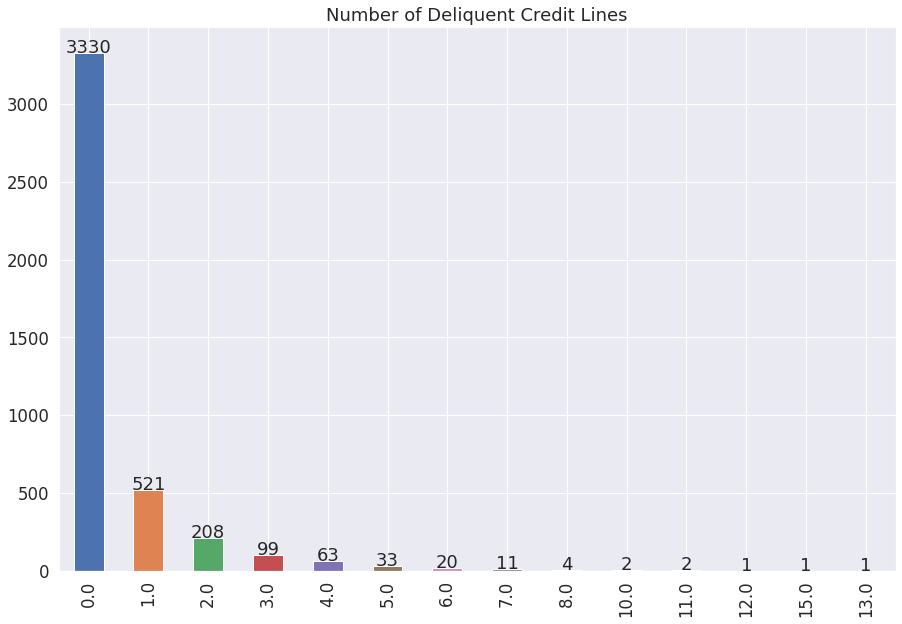

In [15]:
df_train["DELINQ"].value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9'], figsize=(15, 10))
plt.title("Number of Deliquent Credit Lines")
addlabels(df_train["DELINQ"].value_counts().index, df_train["DELINQ"].value_counts().values)

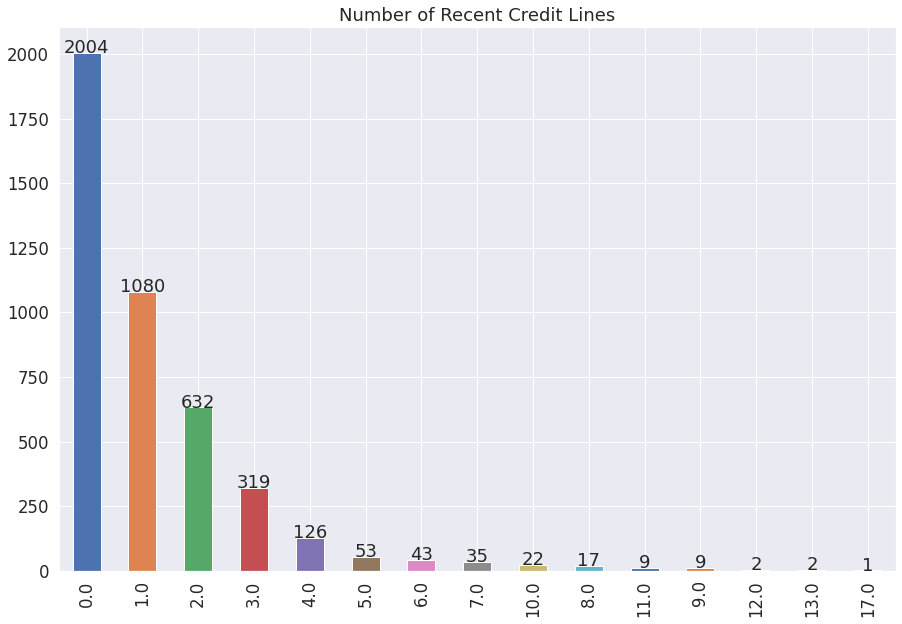

In [16]:
df_train["NINQ"].value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9'], figsize=(15, 10))
plt.title("Number of Recent Credit Lines")
addlabels(df_train["NINQ"].value_counts().index, df_train["NINQ"].value_counts().values)

In [17]:
def ft_understanding_num(num_ft):
  print("Skew : ", '{:1.3f}'.format(df_train[num_ft].skew()))
  print("Kurtosis : ", '{:1.3f}'.format(df_train[num_ft].kurtosis()))
  fig, ax = plt.subplots(figsize=(15, 10))
  sns.histplot(df_train[num_ft], kde=True, ax=ax)
  plt.show()

Skew :  2.046
Kurtosis :  7.089


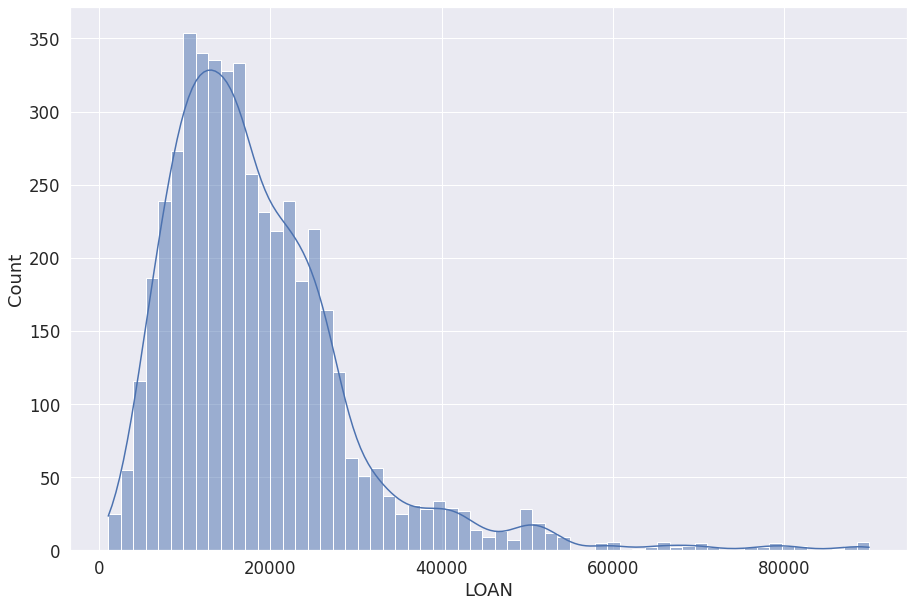

In [18]:
ft_understanding_num('LOAN')

Skew :  1.805
Kurtosis :  6.457


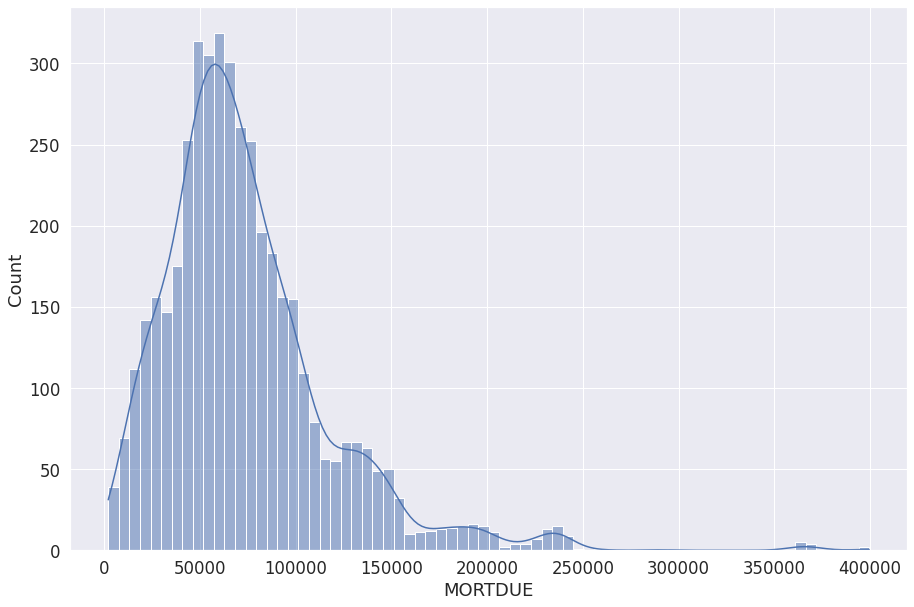

In [19]:
ft_understanding_num('MORTDUE')

Skew :  2.988
Kurtosis :  23.588


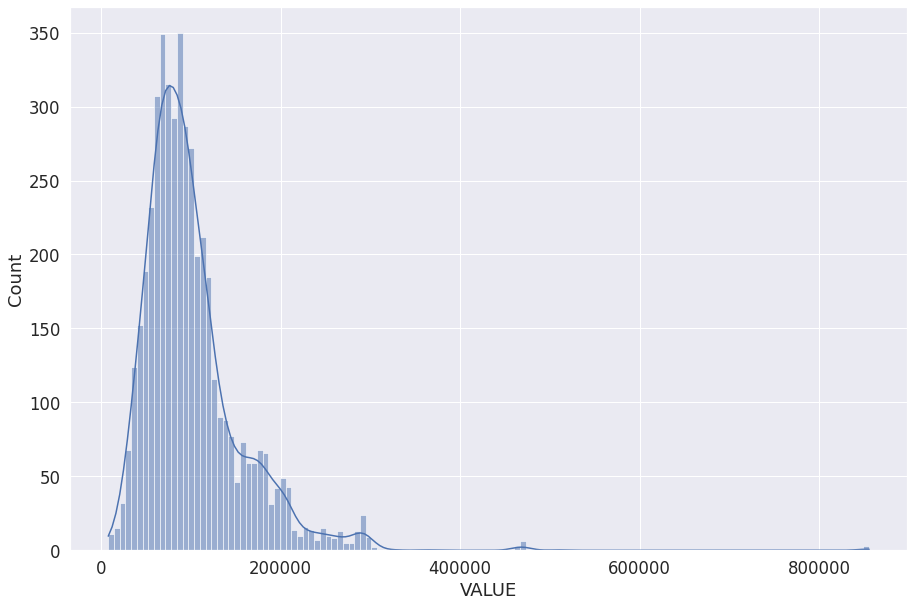

In [20]:
ft_understanding_num('VALUE')

Skew :  0.983
Kurtosis :  0.341


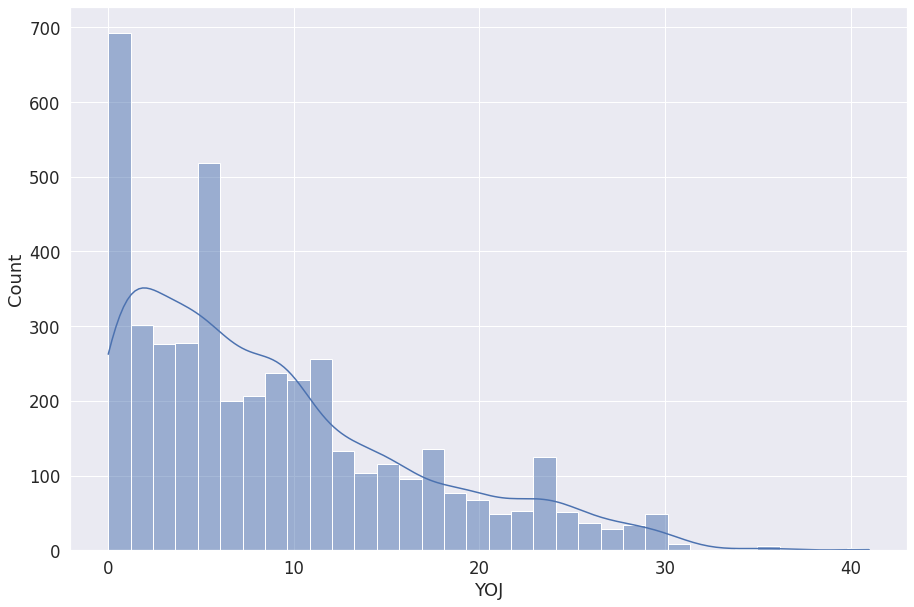

In [21]:
ft_understanding_num('YOJ')

Skew :  1.446
Kurtosis :  8.883


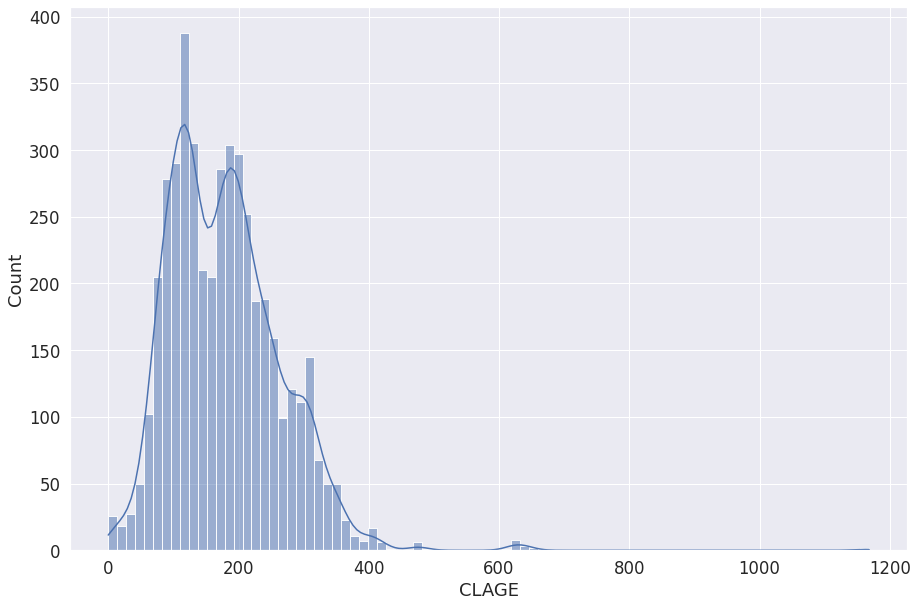

In [22]:
ft_understanding_num('CLAGE')

Skew :  0.792
Kurtosis :  1.224


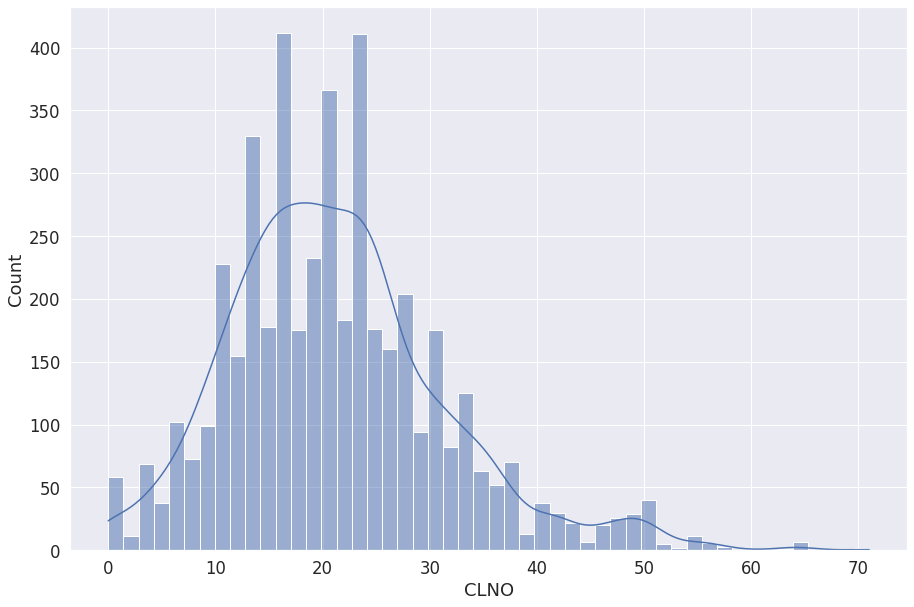

In [23]:
ft_understanding_num('CLNO')

Skew :  2.576
Kurtosis :  53.650


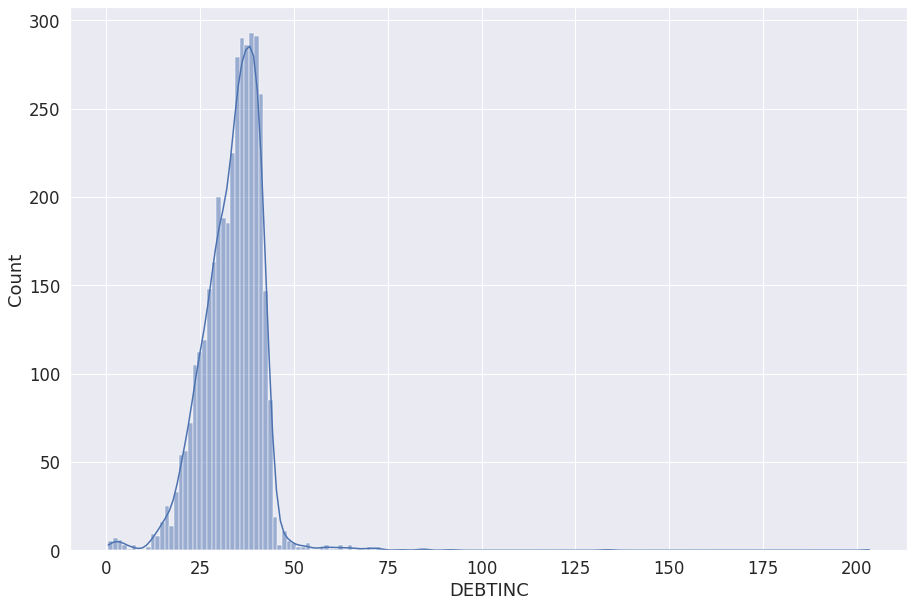

In [24]:
ft_understanding_num('DEBTINC')

**Clean Data**

In [25]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

oe=OrdinalEncoder()
si=SimpleImputer(strategy='most_frequent')

df_train=pd.DataFrame(si.fit_transform(df_train),columns=list(df_train))
df_train=pd.DataFrame(oe.fit_transform(df_train),columns=list(df_train))

df_test=pd.DataFrame(si.fit_transform(df_test),columns=list(df_test))
df_test=pd.DataFrame(oe.fit_transform(df_test),columns=list(df_test))

#Feature Engineer FICO Score

In [26]:
df_train['GOODCL'] = df_train['CLNO']-df_train['DELINQ']
df_test['GOODCL'] = df_test['CLNO']-df_test['DELINQ']

In [27]:
def payment_history(drg):
  payhist = 75
  if drg >= 23:
    payhist = 55
  elif drg >= 12:
    payhist = 25
  elif drg >= 6:
    payhist = 15
  elif drg >= 0:
    payhist = 10
  return payhist

df_train['PAYHIST'] = df_train['DEROG'].apply(lambda x: payment_history(x))
df_train.drop('DEROG',axis=1,inplace=True)

df_test['PAYHIST'] = df_test['DEROG'].apply(lambda x: payment_history(x))
df_test.drop('DEROG',axis=1,inplace=True)

In [28]:
df_train['MONTHLYDEBT'] = (df_train['VALUE']-df_train['MORTDUE'])/(df_train['CLAGE']/(df_train['GOODCL']))
df_test['MONTHLYDEBT'] = (df_test['VALUE']-df_test['MORTDUE'])/(df_test['CLAGE']/(df_test['GOODCL']))

def outstanding_debt(md):
  debt = 30
  if md >= 1000:
    debt = 15
  elif md >= 750:
    debt = 25
  elif md >= 500:
    debt = 40
  elif md >= 100:
    debt = 50
  elif md >= 1:
    debt = 65
  elif md == 0:
    debt = 55
  return debt

df_train['OUTDEBT'] = df_train['MONTHLYDEBT'].apply(lambda x: outstanding_debt(x))
df_train.drop('MONTHLYDEBT',axis=1,inplace=True)

df_test['OUTDEBT'] = df_test['MONTHLYDEBT'].apply(lambda x: outstanding_debt(x))
df_test.drop('MONTHLYDEBT',axis=1,inplace=True)

In [29]:
def credit_history(cl):
  if cl > 48:
    chpoint = 75
  elif cl >= 24:
    chpoint = 60
  elif cl >= 12:
    chpoint = 35
  elif cl < 12:
    chpoint = 12
  return chpoint

df_train['CHLEN'] = df_train['CLAGE'].apply(lambda x: credit_history(x))
df_test['CHLEN'] = df_test['CLAGE'].apply(lambda x: credit_history(x))

In [30]:
def new_credit_pursuit(inq):
  if inq == 0:
    ncp = 70
  elif inq == 1:
    ncp = 60
  elif inq == 2:
    ncp = 45
  elif inq == 3:
    ncp = 25
  elif inq >= 4:
    ncp = 20
  return ncp
  
df_train['NCPURS'] = df_train['NINQ'].apply(lambda x: new_credit_pursuit(x))
df_test['NCPURS'] = df_test['NINQ'].apply(lambda x: new_credit_pursuit(x))

In [31]:
def credit_mix(goodcl):
  cm = 0
  if goodcl == 0:
    cm = 15
  elif goodcl == 1:
    cm = 25
  elif goodcl == 2:
    cm = 50
  elif goodcl == 3:
    cm = 60
  elif goodcl >= 4:
    cm = 50
  return cm

df_train['CRMIX'] = df_train['GOODCL'].apply(lambda x: credit_mix(x))
df_test['CRMIX'] = df_test['GOODCL'].apply(lambda x: credit_mix(x))

In [32]:
df_train['FICO'] = df_train['PAYHIST'] + df_train['OUTDEBT'] + df_train['CHLEN'] + df_train['NCPURS'] + df_train['CRMIX']
df_train.drop(['GOODCL','PAYHIST','OUTDEBT','CHLEN','NCPURS','CRMIX'],axis=1,inplace=True)

df_test['FICO'] = df_test['PAYHIST'] + df_test['OUTDEBT'] + df_test['CHLEN'] + df_test['NCPURS'] + df_test['CRMIX']
df_test.drop(['GOODCL','PAYHIST','OUTDEBT','CHLEN','NCPURS','CRMIX'],axis=1,inplace=True)

<Figure size 432x288 with 0 Axes>

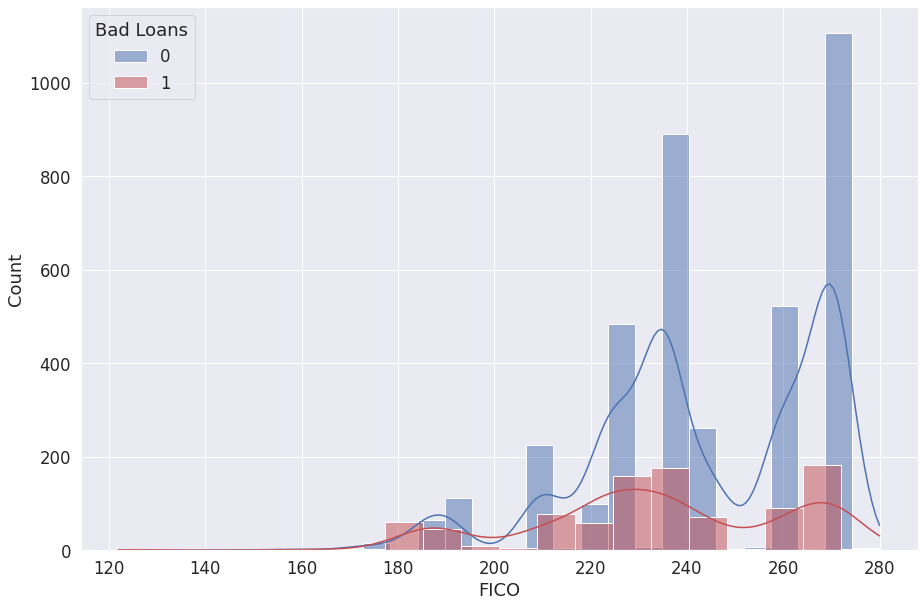

In [33]:
plt.figure()
fig, ax = plt.subplots(figsize=(15, 10))
sns.histplot(df_train['FICO'][df_train['BAD']==0], kde = True,
             label = 0, color='C0', ax=ax)
sns.histplot(df_train['FICO'][df_train['BAD']==1], kde = True,
             label = 1, color='C3', ax=ax)
plt.legend(title="Bad Loans")

#Mutual Information

In [34]:
X = df_train.copy()
y = X.pop("BAD")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [35]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)

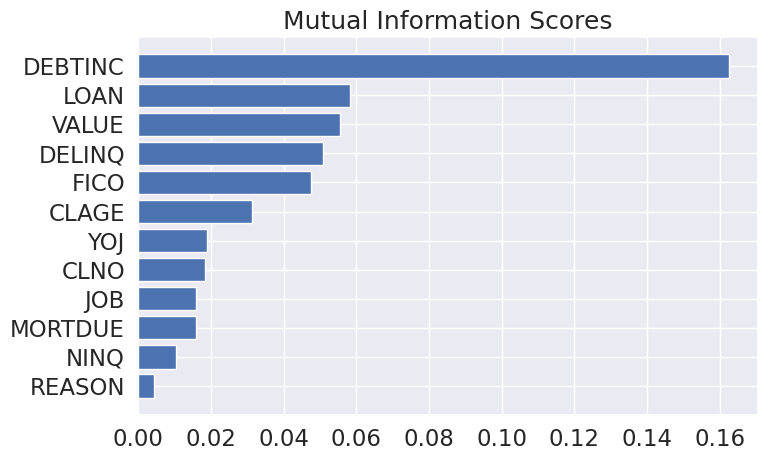

In [36]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

**Remove Outliers**

In [37]:
def remove_outlier(data):
  df_temp = data.copy()
  num = list(df_temp.drop('BAD',axis=1).select_dtypes(include=['int64','float64']).columns)
  for col in num:
    Q1 = np.percentile(df_temp[col], 25, interpolation = 'midpoint')
    Q3 = np.percentile(df_temp[col], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    df_temp = df_temp[df_temp[col] >= (Q1-1.5*IQR)]
    df_temp = df_temp[df_temp[col] <= (Q3+1.5*IQR)]
  return df_temp

# Remove outliers from training and testing datasets
df_train = remove_outlier(df_train)
df_test = remove_outlier(df_test)

# BUILD ENSEMBLE MODEL

In [38]:
x_train = df_train.drop('BAD',axis=1)
y_train = df_train['BAD']
x_test = df_test.drop('BAD',axis=1)
y_test = df_test['BAD']

**Apply SMOTE to Address Class Imbalance in The Target Variable**

In [39]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x_train,y_train=smt.fit_resample(x_train,y_train)

In [40]:
import autosklearn.classification

**Build Classifier using Ensemble Method**

In [41]:
autosklearn_classifier = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task = 80,
    per_run_time_limit = 20,
)

In [42]:
autosklearn_classifier.fit(x_train,y_train)

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      per_run_time_limit=20, time_left_for_this_task=80)

**Results and Analysis**

In [43]:
print(autosklearn_classifier.leaderboard())

          rank  ensemble_weight           type      cost   duration
model_id                                                           
2            1             0.80  random_forest  0.045581  11.601760
7            2             0.16            mlp  0.063924   4.874863
5            3             0.02    gaussian_nb  0.287938   1.141419
6            4             0.02    gaussian_nb  0.306281   1.128026


In [44]:
from sklearn.metrics import classification_report

print(classification_report(y_test, autosklearn_classifier.predict(x_test)))

              precision    recall  f1-score   support

         0.0       0.93      0.74      0.82       716
         1.0       0.24      0.60      0.34       100

    accuracy                           0.72       816
   macro avg       0.59      0.67      0.58       816
weighted avg       0.85      0.72      0.76       816



The class labels for the target variable in this dataset is a bit of an oddity not only because good loan instances outnumber bad loan instances (which is usually the other way around), but also in the sense that a value of '1.0' represents bad loans and the value '0.0' represents good loans. However this is expected since the dataset represents data of actual home credit borrowers who are already on the credit line (as opposed to loan screening data where one would expect more likely defaulters than responsible borrowers). 

Looking at the classification metrics of the ensemble model's performance, the most distinguishable feature is the fact that the recall value for instances classified as bad loans (with a value of 1.0) at 60% far outperforms the model's precision in classifying bad loans (which appears to be abysmal at only 24%). But what this implies is that the model is far better in filtering out bad loans than it is in not missing out on good loans. Which is good as in the case of credit risk modelling, it is more preferable that good loans are classified as bad loans than the other way around. This is because approving bad loans is more harmful to the credit company as it will not only not gain any profit from the loan's interest but is also likely to lose some of its initial principle that was lended to a loan deliquent borrower whilst missing out on good loans only leads to the credit company losing out on the potential profit from its interest (but not so detrimental as to lose more money than it started off with like the case of a bad loan). Looking at the precision value of good loans at 93%, reinforces the model's reliability as this implies that out of all observations classified as good loans only 7% are actually bad loans.